In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [4]:
gdp_df.shape

(8219, 4)

In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

8219 rows, 4 columns, 1 object, 1 int, 2 floats

In [6]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [7]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})

In [8]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [9]:
type(gdp_df)

pandas.core.frame.DataFrame

In [10]:
gdp_df['Country'].describe()

count                            8219
unique                            247
top       Africa Eastern and Southern
freq                               34
Name: Country, dtype: object

In [11]:
not_all_years = gdp_df['Country'].value_counts()
not_all_years.head(230)

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Andorra                        34
Algeria                        34
                               ..
Togo                           34
Trinidad and Tobago            34
Tunisia                        34
Lebanon                        33
Tonga                          33
Name: count, Length: 230, dtype: int64

228 Countries have data for every year, 14 countries are missing MANY years of data (more than 1). (listed below)

In [12]:
not_all_years.tail(14)

Country
Greenland                    32
West Bank and Gaza           30
Serbia                       29
Montenegro                   27
San Marino                   26
CuraÃ§ao                     24
Afghanistan                  24
Virgin Islands               21
Cayman Islands               18
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, dtype: int64

In [13]:
total_years = gdp_df['Year'].value_counts()

In [14]:
type(total_years)

pandas.core.series.Series

In [15]:
total_years = total_years.to_frame()

In [16]:
total_years.sort_values(by = 'Year', ascending = False)

,count
Year,
2023,240
2022,246
2021,247
2020,247
2019,247
2018,247
2017,247
2016,247
2015,247


Observation is that it goes up every year until 2022 and then takes a dip by 1 country and then more in 2023

In [17]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020] ['GDP_Per_Capita']

In [18]:
gdp_2020

3        2769.685745
27       3861.111238
61       4622.731427
95      14650.395929
129     14194.155748
            ...     
8068    45055.782930
8090     5423.682547
8120    18600.986362
8154     3391.595412
8188     2987.269823
Name: GDP_Per_Capita, Length: 247, dtype: float64

In [19]:
gdp_2020 = gdp_2020.to_frame()

In [20]:
gdp_2020.head()

,GDP_Per_Capita
3,2769.685745
27,3861.111238
61,4622.731427
95,14650.395929
129,14194.155748


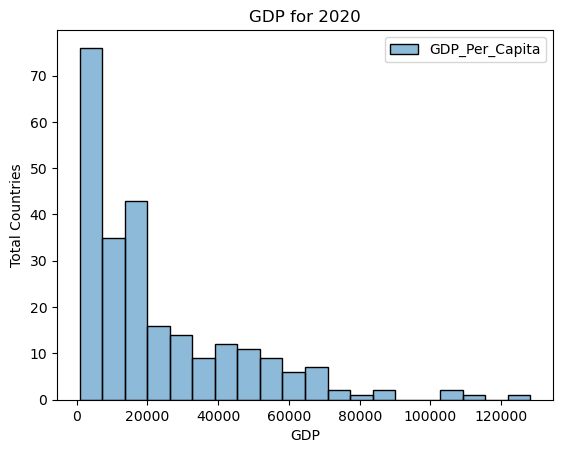

In [21]:
sns.histplot(gdp_2020, bins= 20, kde=False, color = 'blue')
plt.title('GDP for 2020')
plt.xlabel('GDP')
plt.ylabel('Total Countries')
plt.show()

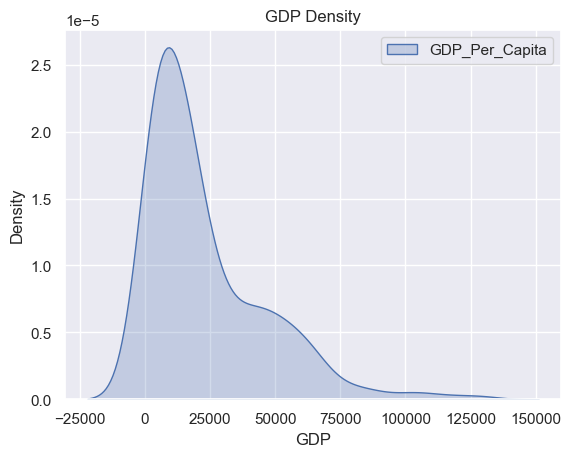

In [22]:
sns.set_theme(style="darkgrid")
sns.kdeplot(gdp_2020, fill=True)
plt.title('GDP Density')
plt.xlabel('GDP')
plt.show()

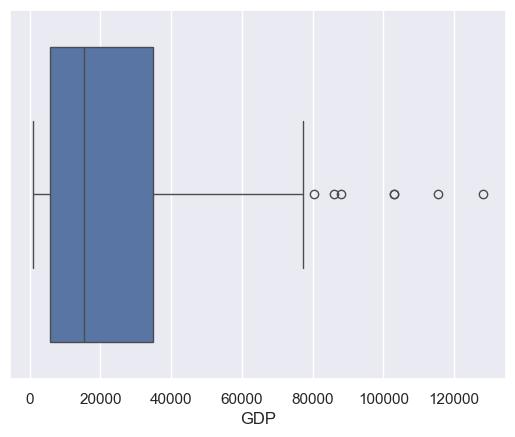

In [23]:
sns.set_theme(style="darkgrid")
sns.boxplot(x=gdp_2020["GDP_Per_Capita"])
plt.xlabel('GDP')
plt.show()

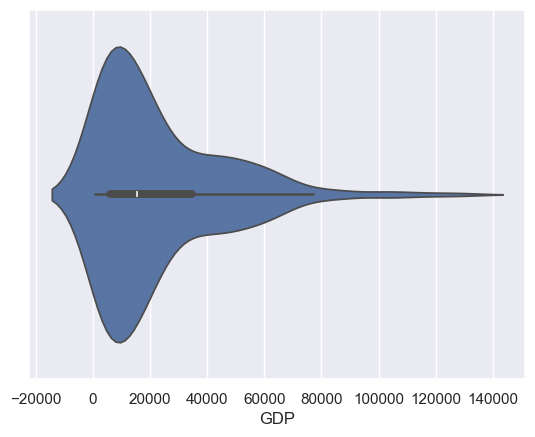

In [24]:
sns.violinplot(x=gdp_2020["GDP_Per_Capita"])
plt.xlabel('GDP')
plt.show()

I notice a lot more countries are towards the lower end of GDP than some. 

In [25]:
type(gdp_2020)

pandas.core.frame.DataFrame

In [26]:
gdp_2020_sorted = gdp_2020.sort_values(by= 'GDP_Per_Capita', ascending = False)

In [27]:
gdp_2020_sorted.median()

GDP_Per_Capita    15309.235988
dtype: float64

Question 9 = 15309.24

In [28]:
four_years = [1990, 2000, 2010, 2020]
gdp_decades = gdp_df.loc[gdp_df['Year'].isin(four_years)]
gdp_decades

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


In [29]:
type(gdp_decades)

pandas.core.frame.DataFrame

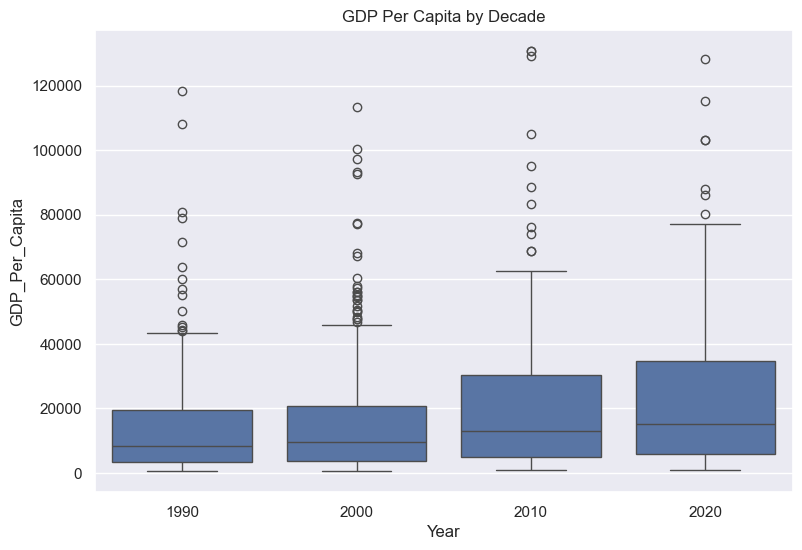

In [30]:
plt.figure(figsize=(9,6))
sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)
plt.title('GDP Per Capita by Decade')
plt.show()

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

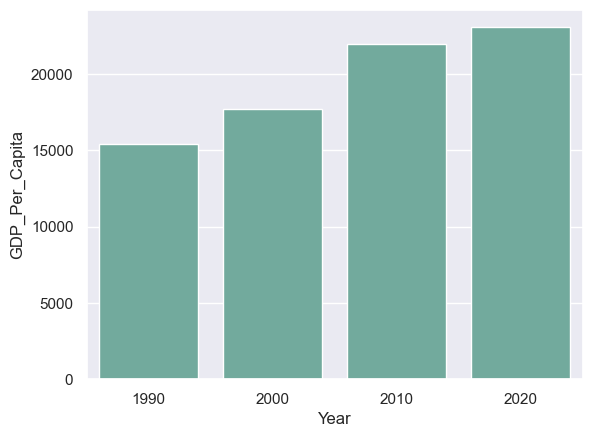

In [31]:
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades,  
    errorbar=None, 
    color='#69b3a2')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

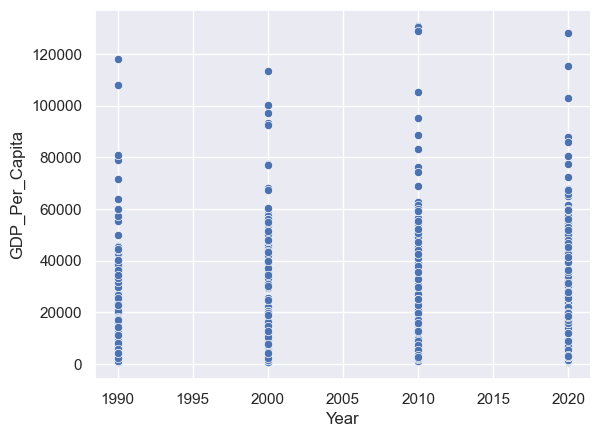

In [32]:
sns.scatterplot(
   x="Year",
   y="GDP_Per_Capita",
   data=gdp_decades
)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

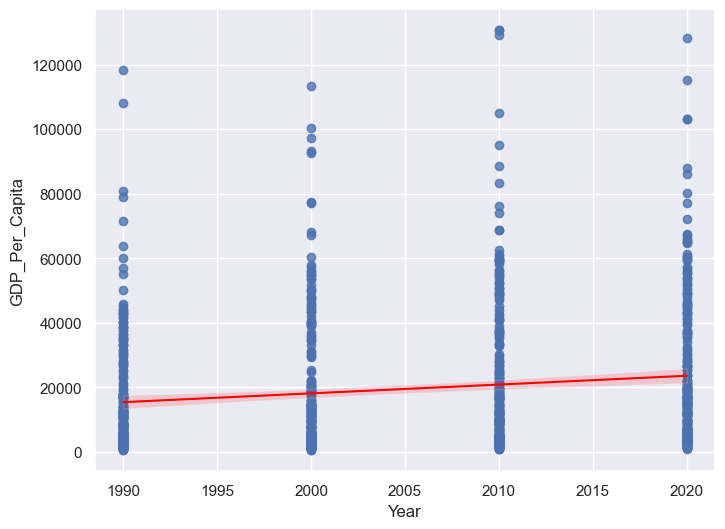

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "red", "linewidth": 1.5},
    ax=ax
)

It seems GDP has gone up slightly over the years. The trend line on this last scatterplot helps see this a lot better than the previous scatter and the bar plot I believe helps show it the best and is easiest on the eyes. 

In [34]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [35]:
gdp_over_100 = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]

In [36]:
gdp_over_100.sort_values('Year')

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
972,Brunei,1992,111457.220910
...,...,...,...
4457,"Macao SAR, China",2023,104961.643485
3490,Ireland,2023,115401.125283
4423,Luxembourg,2023,130373.477942
6511,Singapore,2023,127543.554752


11. Brunei and UAE show over 100k in 1990

In [37]:
gdp_2020_new = gdp_df[gdp_df['Year'] == 2020]

In [38]:
gdp_2020_new.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


In [39]:
lux_gdp = gdp_df[gdp_df['Country'] == 'Luxembourg']
lux_gdp

,Country,Year,GDP_Per_Capita
4423,Luxembourg,2023,130373.477942
4424,Luxembourg,2022,134507.667531
4425,Luxembourg,2021,135379.291201
4426,Luxembourg,2020,128256.560341
4427,Luxembourg,2019,131609.099616
4428,Luxembourg,2018,130415.193065
4429,Luxembourg,2017,131353.485059
4430,Luxembourg,2016,132836.085831
4431,Luxembourg,2015,129293.707435
4432,Luxembourg,2014,129443.183641


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

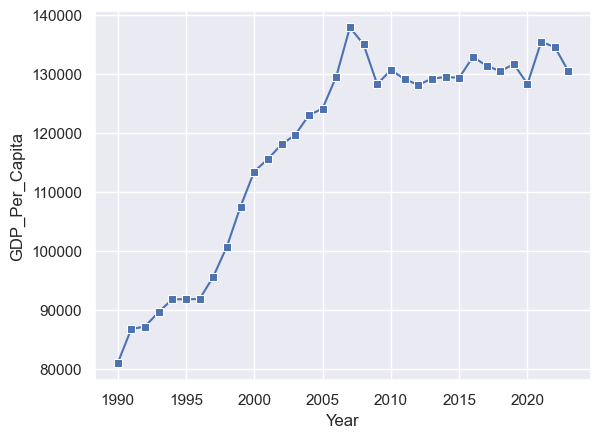

In [40]:
sns.lineplot(
    x='Year',
    y='GDP_Per_Capita',
    data=lux_gdp,
    marker= 's'
)

In [41]:
gdp_2020_new.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


In [42]:
burundi_gdp = gdp_df[gdp_df['Country'] == 'Burundi']
burundi_gdp

,Country,Year,GDP_Per_Capita
1043,Burundi,2023,828.861074
1044,Burundi,2022,829.387160
1045,Burundi,2021,836.665571
1046,Burundi,2020,833.920257
1047,Burundi,2019,855.732720
1048,Burundi,2018,868.555508
1049,Burundi,2017,880.993440
1050,Burundi,2016,897.459046
1051,Burundi,2015,918.557193
1052,Burundi,2014,977.765840


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

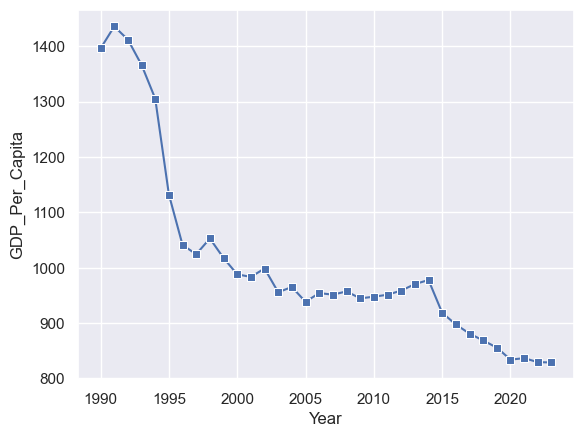

In [43]:
sns.lineplot(
    x='Year',
    y='GDP_Per_Capita',
    data=burundi_gdp,
    marker= 's'
)

Bonus- Yes, there is generally higher gdp per capita in 2020 than in 1990.

In [44]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows= 6083)

In [45]:
internet_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60000,1
1,Afghanistan,2018,16.80000,2
2,Afghanistan,2017,13.50000,3
3,Afghanistan,2016,11.00000,4
4,Afghanistan,2015,8.26000,4
5,Afghanistan,2014,7.00000,4
6,Afghanistan,2013,5.90000,4
7,Afghanistan,2012,5.45455,4
8,Afghanistan,2011,5.00000,4
9,Afghanistan,2010,4.00000,4


In [46]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6073,Zimbabwe,2002,1.100000,4
6074,Zimbabwe,2001,0.799846,NaN
6075,Zimbabwe,2000,0.401434,NaN
6076,Zimbabwe,1999,0.161676,NaN
6077,Zimbabwe,1998,0.081648,NaN
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [47]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [48]:
internet_df = internet_df.rename(columns = {'Country or Area': 'Country', 'Year': 'Year', 'Value': 'Internet_Users_Pct'})

In [49]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


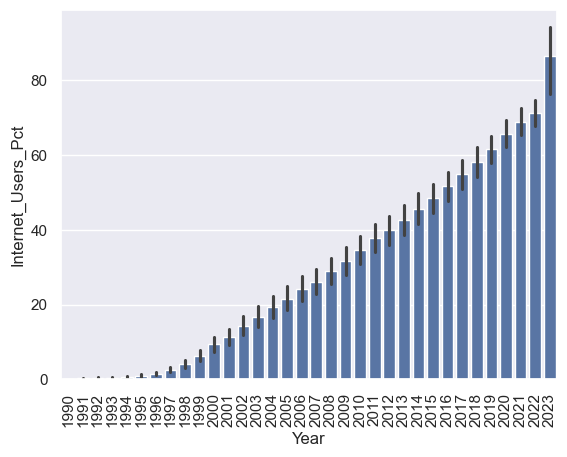

In [50]:
sns.barplot(
    x="Year", 
    y="Internet_Users_Pct", 
    data=internet_df)
plt.xticks(rotation = 90);

16. Looks like the internet expanded heavily since 1999 and exploded from 2022 to 2023.
17. 1991 has the first non-zero internet usage. 

In [51]:
internet_2014 = internet_df[internet_df['Year'] == 2014] 
internet_2000 = internet_df[internet_df['Year'] == 2000] 
internet_2014['Internet_Users_Pct'].sum()/internet_2000['Internet_Users_Pct'].sum()*100

np.float64(474.71171231145075)

18. From 2000 to 2014 there was a 475% increase. 

In [52]:
internet_less_than_5 = internet_2014[internet_2014['Internet_Users_Pct'] < 5]
internet_less_than_5

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


19. 10 countries are less than 5 percent of users in 2014

In [53]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, 
                               on =['Country', 'Year'],
                               how = 'inner')
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2927.245144,17.60
1,Afghanistan,2018,2902.392113,16.80
2,Afghanistan,2017,2952.998916,13.50
3,Afghanistan,2016,2958.785399,11.00
4,Afghanistan,2015,2967.692067,8.26


In [54]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4798,Zimbabwe,1997,4304.406272,0.033080
4799,Zimbabwe,1996,4271.479930,0.016790
4800,Zimbabwe,1995,3935.280057,0.007684
4801,Zimbabwe,1994,3965.730986,0.001739
4802,Zimbabwe,1990,4013.299059,0.000000


In [55]:
top_3_internet = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].nlargest(3, 'Internet_Users_Pct')['Country']

In [56]:
top_3_internet

1992    Iceland
540     Bermuda
3268     Norway
Name: Country, dtype: object

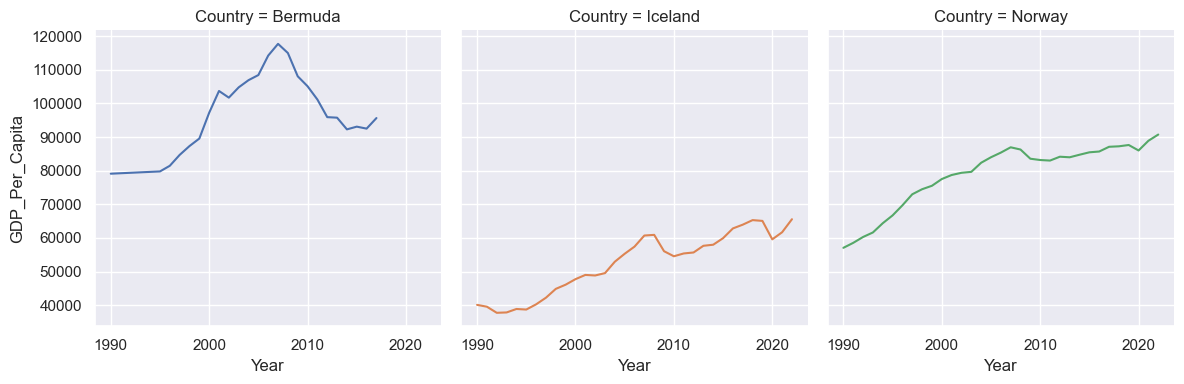

In [57]:
g = sns.FacetGrid(gdp_and_internet_use[gdp_and_internet_use["Country"].isin(top_3_internet)],
                           col= 'Country', hue= 'Country', col_wrap=3, height=4)
g.map(sns.lineplot,'Year', 'GDP_Per_Capita')
plt.show()

Bermuda had a big spike of GDP and leveled out while Iceland and Norway increased over time. 

In [58]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [59]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,3017.942544,7.0000
27,Albania,2014,12788.747231,54.3000
56,Algeria,2014,15073.762940,29.5000
85,Andorra,2014,59929.244467,86.1000
112,Angola,2014,10250.592404,21.3623
...,...,...,...,...
4666,Uzbekistan,2014,7145.109807,35.5000
4695,Vanuatu,2014,3320.379187,18.8000
4723,Viet Nam,2014,8751.882806,41.0000
4751,Zambia,2014,3585.577485,6.5000


<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

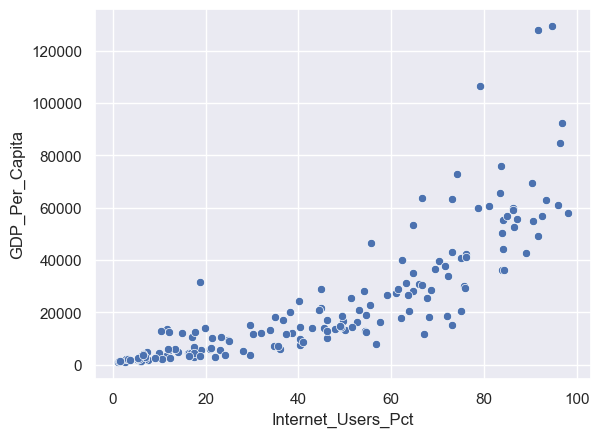

In [60]:
sns.scatterplot(data=gdp_and_internet_use_2014, x='Internet_Users_Pct', y='GDP_Per_Capita')

As internet users go up, so does GDP per capita. 

In [64]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3, labels = ['Low', 'Medium', 'High'])

C:\Users\jacob\AppData\Local\Temp\ipykernel_2232\1806623617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3, labels = ['Low', 'Medium', 'High'])


In [66]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
5,Afghanistan,2014,3017.942544,7.0000,Low
27,Albania,2014,12788.747231,54.3000,Medium
56,Algeria,2014,15073.762940,29.5000,Medium
85,Andorra,2014,59929.244467,86.1000,High
112,Angola,2014,10250.592404,21.3623,Medium
...,...,...,...,...,...
4666,Uzbekistan,2014,7145.109807,35.5000,Low
4695,Vanuatu,2014,3320.379187,18.8000,Low
4723,Viet Nam,2014,8751.882806,41.0000,Medium
4751,Zambia,2014,3585.577485,6.5000,Low


In [67]:
gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()

C:\Users\jacob\AppData\Local\Temp\ipykernel_2232\1179629846.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


GDP_group
Low       11.4000
Medium    45.5904
High      76.1603
Name: Internet_Users_Pct, dtype: float64